# Jupyter Lab

There are two main types of cells in JupyterLab. Markdown cells and code cells. This is a markdown cell. You can select the cell type from the bar at the top, or when it editing mode (Esc) you can press (M).

Try clicking this cell and editing the equations below:

$E=mc^2$.

Below we have a code cell where we are going to add our f16 code to the path for jupyterlab.

## List

* Mutable (you can change it)
* Ordered

In [1]:
my_list = [1, 2, 3, 4]
print(my_list)

[1, 2, 3, 4]


In [2]:
my_list[0] = 6
my_list # note this will print by default

[6, 2, 3, 4]

You may also create lists on the fly using list comprehension, this is like a compact for loop:

In [3]:
my_quick_list = [2*k + 3 for k in [1, 2, 3]]
my_quick_list

[5, 7, 9]

## Tuple

* Non-Mutable (you can't change it)
* Ordered

In [4]:
my_tuple = (1, 2, 3, 4)
my_tuple

(1, 2, 3, 4)

In [5]:
my_tuple[0] = 1

TypeError: 'tuple' object does not support item assignment

In [ ]:
my_quick_tuple = (2*k + 3 for k in [1, 2, 3]) # this forms a generator
my_quick_tuple
for data in my_quick_tuple:
    print(data)

## Dictionary

* A map between keys and values
* Mutablemy_tuple can change it)
* Key access (fast translation from key to element location using a Hashmap)
* Not-ordered

In [ ]:
object_colors = {
    'car': 'red',
    'tree': 'green',
}

In [ ]:
object_colors['car']

If a key is not defined it will give an error.

In [ ]:
object_colors['table']

If you assign to a key that is not defined, it will add it.

In [ ]:
object_colors['sky'] = 'blue'
object_colors

In [ ]:
my_quick_dict = {str(k): 2*k + 3 for k in [1, 2, 3]}
my_quick_dict

You can get a list of keys of the dict using:

In [ ]:
my_quick_dict.keys()

In [ ]:
my_quick_dict.values()

In [ ]:
my_quick_dict.items()

## Functions/ Control Statements/ Variable Scope

Scope controls the lifte time of a variable. Variables created in functions are deleted when the function returns and they are nolonger used. Variables defined in a function are not globally defined. Variables in for/if loops are globally defined.

In [55]:
for i in range(10):
    c = i
print(c)

9


In [56]:
def my_function():
    d = 10
print(d)

NameError: name 'd' is not defined

In [57]:
if i < 100:
    e = 60
print(e)

60


## Class

* Represents a user defined type.
* You should uses classes when you have many of the same type of object in your code.

In [42]:
class Car():
    
    def __init__(self, top_speed):
        """
        this is called a constructor, it constructs the class
        """
        print("making a new MyClass")
        
        # store attributes
        self.top_speed = top_speed
    
    def drive(self, throttle):
        if throttle < self.top_speed:
            return throttle
        else:
            return self.top_speed
    
    def __str__(self):
        return "I'm a car and my top speed is {:f}".format(self.top_speed)
    
    def __del__(self):
        """
        This is the deconstructor, it is called when the class instance is destoryed
        by calling delete on it
        """
        print('what a world... what a world...')
        
    __repr__ = __str__  # tell it to use the string function for the
        # representation function

In [43]:
c = Car(1)
print(c)

making a new MyClass
I'm a car and my top speed is 1.000000


In [44]:
del c

what a world... what a world...


In [49]:
def my_function_that_has_scope():
    c = Car(top_speed=10)  # note you can pass arguments by name

In [50]:
my_function_that_has_scope()

making a new MyClass
what a world... what a world...


Question: Why was delete called on c above?

## Group Exercise

Split into your teams for this exercise.

You are given the position and velocity of aircraft flying in straight lines. The data is in the format:
       

(identifier, x, y, v_x, v_y, model)

where model is the aicraft model (a string), (x, y) is the position and ($v_x$, $v_y$) is the velocity.

You are also given a dictionary of model information for the aircraft:

{'f16': 20, 'b737': 100} 

### Objectives:

* Find the aircraft that are in collision and report their identifiers as a tuple.
* Plot the aircraft.

In [21]:
import numpy as np
import json
import matplotlib.pyplot as plt
np.random.seed(1234)
# create a data set
model_data = {
    'f16': {
        'safety_radius': 10,
        'passengers': 1
    },
    '737': {
        'safety_radius': 20,
        'passengers': 300
    }
}
data = []
for ident in range(100):
    model = np.random.choice([k for k in model_data.keys()])
    x = np.random.randn()*500
    y = np.random.randn()*500
    vx = np.random.randn()*100
    vy = np.random.randn()*100
    data.append([ident, x, y, vx, vy, model])

with open('data.json', 'w') as f:
    json.dump(data, f)

with open('data.json', 'r') as f:
    data = json.load(f)

data[0]

[0,
 673.0627001754954,
 -4.94747881000494,
 134.86939032393707,
 55.721062073474904,
 '737']

You should plot the aircraft using the quiver command:

If you want to show the help for quiver type:

```python
plt.quiver?
```

## Write your code here

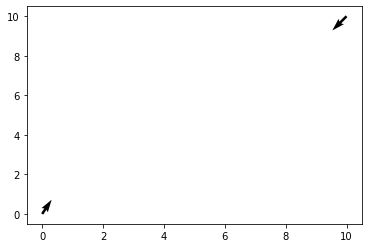

In [14]:
plt.quiver([0, 10], [0, 10], [2, -3], [3, -3])

boom
boom
boom
boom


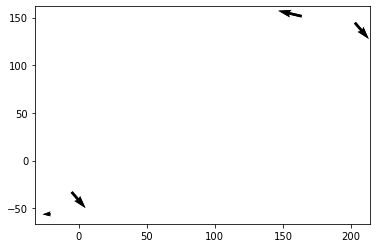

In [23]:
boom_p = []
for p1 in data:
    id1 = p1[0]
    coli_rad1 = model_data[p1[5]]['safety_radius']
    pos1 = np.array(p1[1:3])
    
    for p2 in data:
        id2 = p2[0]
        pos2 = np.array(p2[1:3])
        coli_rad2 = model_data[p2[5]]['safety_radius']
        if not id1 == id2:
            if np.linalg.norm(pos1-pos2) < (coli_rad1+coli_rad2):
                print('boom')
                boom_p.append(p1)
                boom_p.append(p2)
x_data = [bp[1] for bp in boom_p]
y_data = [bp[2] for bp in boom_p]
vx_data = [bp[3] for bp in boom_p]
vy_data = [bp[4] for bp in boom_p]
plt.quiver(x_data,y_data,vx_data,vy_data)

In [24]:
print(len(boom_p))

8
